In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import os
import researchpy as rp
 
## Jaume 
# os.chdir("C:/Users/Jaume/Documents/MDDB/Business Statistics/Business Statistics Project/Files")
# os.getcwd()

## Can 
# os.chdir('/Users/cansenturk/Desktop/School/Master/Business-Statistics/Assignment')
#os.getcwd()

## Nadia
# os.chdir("C:/Users/nafla/OneDrive/Documents/statistic/assignment/BusinessStatisticsAssessment")
# os.getcwd()

# Max
file_path = (r'/Users/maxheijmans/Downloads/GenderPayGap.csv')

genderPayGap_DataFrame = pd.read_csv("GenderPayGap.csv")

# Print the data to check if the import went correctly
genderPayGap_DataFrame.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [2]:
# Describing statistical information for each variable
codebook=rp.codebook(genderPayGap_DataFrame)
print(codebook)

Variable: JobTitle    Data Type: object 

 Number of Obs.: 1000 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 10 

 Data Values and Counts: 
 
              Values  Frequency
     Data Scientist        107
             Driver         91
  Financial Analyst        107
   Graphic Designer         98
                 IT         96
            Manager         90
Marketing Associate        118
    Sales Associate         94
  Software Engineer        109
Warehouse Associate         90




Variable: Gender    Data Type: object 

 Number of Obs.: 1000 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 2 

 Data Values and Counts: 
 
 Values  Frequency
Female        468
  Male        532




Variable: Age    Data Type: int64 

 Number of Obs.: 1000 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 48 

 Range: [18, 65] 
 Mean: 41.39 
 Standard Deviation: 14.29 
 Mode: 18 
 10th Percentile: 22.0 
 25th Percen

# Exploratory Data Analysis

In [3]:
# EDA overview of the data
genderPayGap_DataFrame.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


/var/folders/8f/d6vjtm3s1n94f73t1f5h0drm0000gn/T/ipykernel_11115/3730448986.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


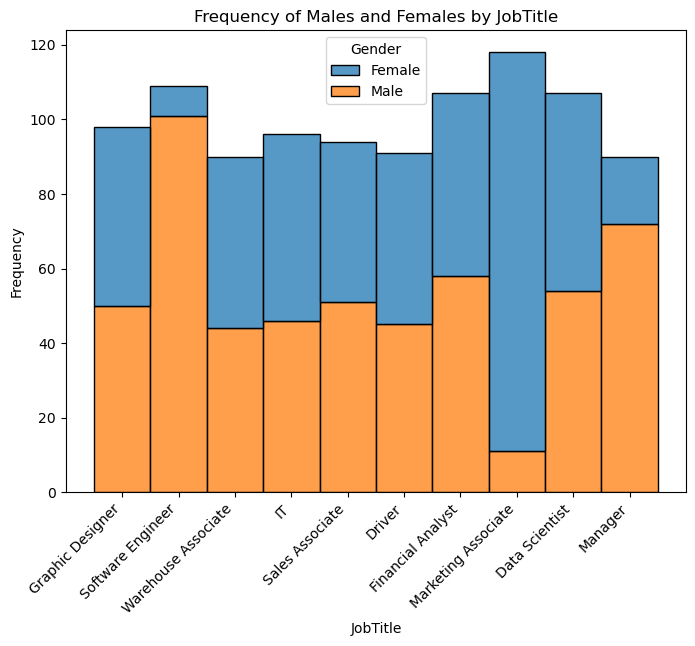

/var/folders/8f/d6vjtm3s1n94f73t1f5h0drm0000gn/T/ipykernel_11115/3730448986.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


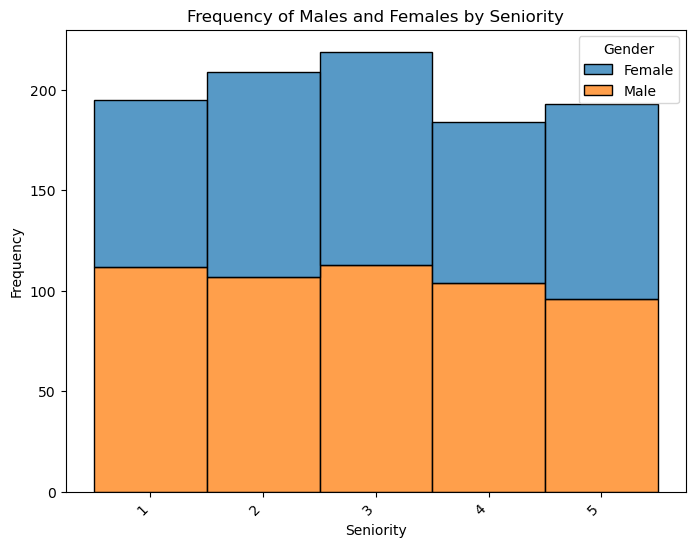

/var/folders/8f/d6vjtm3s1n94f73t1f5h0drm0000gn/T/ipykernel_11115/3730448986.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


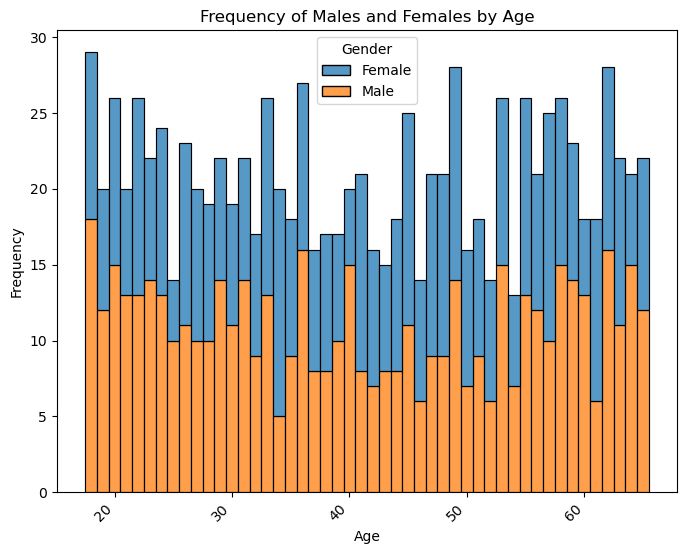

/var/folders/8f/d6vjtm3s1n94f73t1f5h0drm0000gn/T/ipykernel_11115/3730448986.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


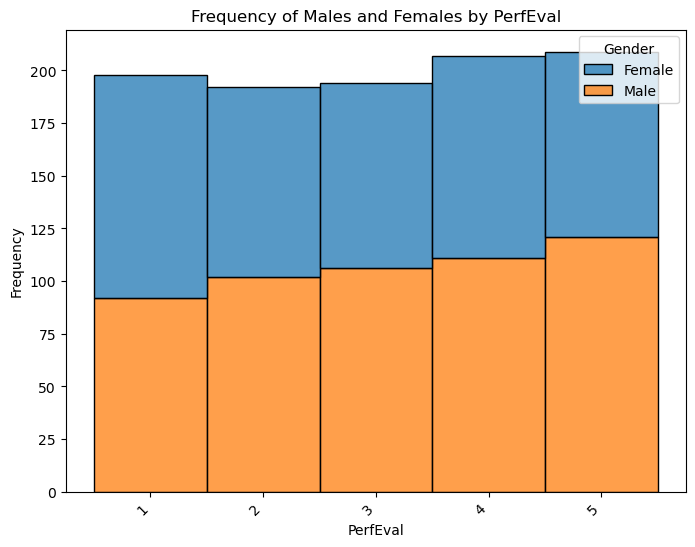

/var/folders/8f/d6vjtm3s1n94f73t1f5h0drm0000gn/T/ipykernel_11115/3730448986.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


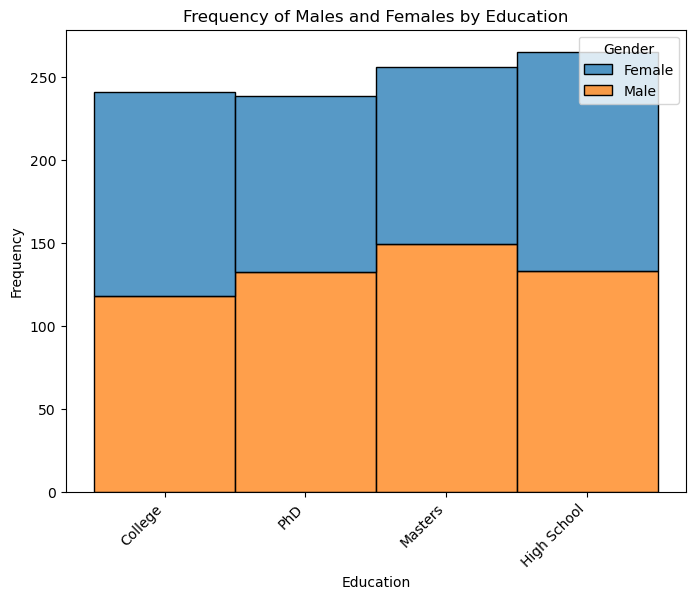

In [4]:
# List of categorical columns for which we want to create frequency histograms
categorical_columns = ['JobTitle', 'Seniority', 'Age', 'PerfEval', 'Education'] 

# In this for-loop, create a histogram for each category to see frequency of genders in each sub-category
# The for-loop end when all columns have a histogram
for column in categorical_columns:
    plt.figure(figsize=(8, 6))

    # Create a histogram with hues for Gender
    ax=sns.histplot(data=genderPayGap_DataFrame, x=column, hue="Gender", multiple="stack", discrete=True)
    
    # Rotate x-axis labels by 45 degrees to create vertical bars
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    
    # Set plot labels and title
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Frequency of Males and Females by {column}")
    
    # Show the plot
    plt.show()

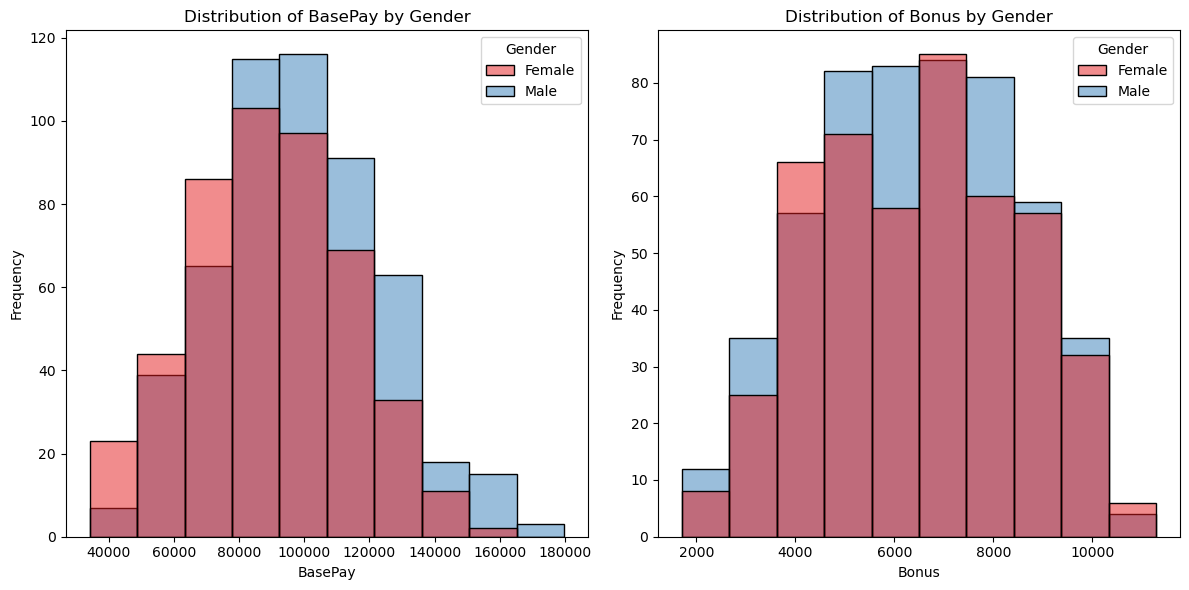

In [5]:
# Create a plot with two histograms for 'BasePay' and 'Bonus' and the frequency of each gender to check the normality of the data distribution 
plt.figure(figsize=(12, 6))

# Plot for frequency of genders based on 'BasePay', same color scheme to see differences
plt.subplot(1, 2, 1)
sns.histplot(data=genderPayGap_DataFrame, x='BasePay', hue='Gender', kde=False, bins=10, palette='Set1')
plt.title('Distribution of BasePay by Gender')
plt.xlabel('BasePay')
plt.ylabel('Frequency')

# Plot for frequency of genders based on 'Bonus', same color scheme to see differences
plt.subplot(1, 2, 2)
sns.histplot(data=genderPayGap_DataFrame, x='Bonus', hue='Gender', kde=False, bins=10, palette='Set1')
plt.title('Distribution of Bonus by Gender')
plt.xlabel('Bonus')
plt.ylabel('Frequency')

# Show the histogram in a small lay-out so they are next to each other
plt.tight_layout()
plt.show()

According to the above plots, the data is approximately normally distributed across BasePay and Bonus range.
Both male and female show a bell shaped graph, albeit skewed.

In [6]:
# To make sure about the correlation of our variables we will do both Pearson and Spearman correlation tests

# Import necessary packages
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Calculate Pearson correlation for 'BasePay' and 'Bonus'
corr_pearson, _ = pearsonr(genderPayGap_DataFrame['BasePay'], genderPayGap_DataFrame['Bonus'])

# Calculate Spearman correlation for 'BasePay' and 'Bonus'
corr_spearman, _ = spearmanr(genderPayGap_DataFrame['BasePay'], genderPayGap_DataFrame['Bonus'])

# Print the results
print("Pearson Correlation:", corr_pearson)
print("Spearman Correlation:", corr_spearman)

Pearson Correlation: -0.12948070482622634
Spearman Correlation: -0.13974860767657124


### Pearson correlation: 
- The Pearson correlation coefficient is -0.1295, which is close to zero and negative.
- A value close to zero indicates a weak linear relationship, and the negative sign suggests an inverse relationship, meaning that as one variable increases (BasePay), the other tends to decrease (Bonus), although the relationship is not strong.

### Spearman correlation: 
- The Spearman correlation coefficient is -0.1397.
- A negative value indicates a negative monotonic relationship, meaning that as one variable increases (BasePay), the other tends to decrease (Bonus) in a non-linear fashion. Similarly, the relationship is not strong.

The two results of correlations support each other so we accept that there is no strong relationship between BasePay and Bonus.

In [7]:
# Pearson and Spearman correlation for Age and Bonus

# Calculate Pearson correlation for 'Age' and 'Bonus'
corr_pearson, _ = pearsonr(genderPayGap_DataFrame['Age'], genderPayGap_DataFrame['Bonus'])

# Calculate Spearman correlation for 'Age' and 'Bonus'
corr_spearman, _ = spearmanr(genderPayGap_DataFrame['Age'], genderPayGap_DataFrame['Bonus'])

# Print the results
print("Pearson Correlation:", corr_pearson)
print("Spearman Correlation:", corr_spearman)

Pearson Correlation: -0.4143371483450372
Spearman Correlation: -0.3975773382043952


These values represents a moderately strong negative linear relationship between 'Age' and 'Bonus.' (-0.414 and -0.398 respectively)

Therefore: As 'Age' increases, 'Bonus' tends to decrease, and the relationship is significant.

In [8]:
# Pearson and Spearman correlation for Age and BasePay

# Calculate Pearson correlation for 'Age' and 'BasePay'
corr_pearson, _ = pearsonr(genderPayGap_DataFrame['Age'], genderPayGap_DataFrame['BasePay'])

# Calculate Spearman correlation for 'Age' and 'BasePay'
corr_spearman, _ = spearmanr(genderPayGap_DataFrame['Age'], genderPayGap_DataFrame['BasePay'])

print("Pearson Correlation:", corr_pearson)
print("Spearman Correlation:", corr_spearman)

Pearson Correlation: 0.5626812686863857
Spearman Correlation: 0.5634455905801844


This values represents a moderately strong positive linear relationship between 'Age' and 'BasePay.' (0.563 and 0.563 respectively)

Therefore: As 'Age' increases, 'BasePay' tends to increase as well, and the relationship is significant.

# Average BasePay for Gender 

H0: The average "BasePay" for male and female employees is equal

H1: The average "BasePay" for male and female employees is not equal

In [9]:
# First we separate 'BasePay' data for male and female employees to test the difference in their average BasePay
basepay_male = genderPayGap_DataFrame[genderPayGap_DataFrame['Gender'] == 'Male']['BasePay']
basepay_female = genderPayGap_DataFrame[genderPayGap_DataFrame['Gender'] == 'Female']['BasePay']

# Check the variances of both groups
variance_male = basepay_male.var()
variance_female = basepay_female.var()

# Print the results
print("The variance for females is:", variance_female)
print("The variance for males is:", variance_male)

The variance for females is: 594300414.3459575
The variance for males is: 651143843.6608616


In [10]:
# Perform a two-sample t-test for BasePay with unequal variances
t_statistic, p_value = stats.ttest_ind(basepay_male, basepay_female, equal_var=False)

# Set significance level
alpha = 0.05  

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the null hypothesis based on if p < alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average 'BasePay' for male and female employees.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' for male and female employees.")

T-Statistic: 5.391846621157036
P-Value: 8.718919245645663e-08
Reject the null hypothesis: There is a significant difference in average 'BasePay' for male and female employees.


# Average Bonus for Gender 

H0: The average "Bonus" for male and female employees is equal

H1: The average "Bonus" for male and female employees is not equal

In [11]:
# First separate 'Bonus' data for male and female employees to test the difference in their average Bonus
Bonus_male = genderPayGap_DataFrame[genderPayGap_DataFrame['Gender'] == 'Male']['Bonus']
Bonus_female = genderPayGap_DataFrame[genderPayGap_DataFrame['Gender'] == 'Female']['Bonus']

# Check the variances of both groups
variance_male = Bonus_male.var()
variance_female = Bonus_female.var()

# Print the results
print("The variance for females is:", variance_female)
print("The variance for males is:", variance_male)

The variance for females is: 4037982.6979080844
The variance for males is: 4007028.0066373586


In [12]:
# Perform a two-sample t-test for Bonus with unequal variances
t_statistic, p_value = stats.ttest_ind(Bonus_female, Bonus_male, equal_var=False)

# Set significance level
alpha = 0.05  

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the null hypothesis based on if p < alpha.
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average 'Bonus' for male and female employees.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average 'Bonus' for male and female employees.")

T-Statistic: 0.10131443026968709
P-Value: 0.9193215675859101
Fail to reject the null hypothesis: There is no significant difference in average 'Bonus' for male and female employees.


As indicated in the results of T-tests for diffrences in average "BasePay" and "Bonus" for men and women, there is no significant differences in the "bonus", However in can be seen that there is significant differences in BasePay between men and women. So in the following parts we focus on the impact of different variables in data set on "BasePay"

# Difference in the BasePay for men and women per Education level (T-test)

H0 = There is no difference in base pay between men and women per education level.

H1 = There is a difference in base pay between men and women per education level.


In [13]:
# Getting unique education levels
education_values = genderPayGap_DataFrame['Education'].unique()

# Create a for-loop to perform a t-test for the avarage BasePay of males and females in each education level
for education_level in education_values:
    male_basepay = genderPayGap_DataFrame[(genderPayGap_DataFrame['Education'] == education_level) & (genderPayGap_DataFrame['Gender'] == 'Male')]['BasePay']
    female_basepay = genderPayGap_DataFrame[(genderPayGap_DataFrame['Education'] == education_level) & (genderPayGap_DataFrame['Gender'] == 'Female')]['BasePay']

    t_statistic, p_value = stats.ttest_ind(male_basepay, female_basepay, equal_var=False)

    print(f"Education Level: {education_level}")
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this education category.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this education category.")
    print("\n")


Education Level: College
T-Statistic: 3.8081938486193945
P-Value: 0.00018056725097110088
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this education category.


Education Level: PhD
T-Statistic: 1.8776066393442459
P-Value: 0.06167195948154506
Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this education category.


Education Level: Masters
T-Statistic: 2.816156377521798
P-Value: 0.005297300945833165
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this education category.


Education Level: High School
T-Statistic: 1.7826075862029735
P-Value: 0.07582455227745408
Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this education category.




### Interpretation:
According to the results of the t-tests for different education levels:

1. **College Education Level:** There is a significant difference in the average 'BasePay' between male and female employees with a "College" education level. Male and female employees with a "College" education level have significantly different average 'BasePay.'

2. **PhD Education Level:** There is no significant difference in the average 'BasePay' between male and female employees with a "PhD" education level. Male and female employees with a "PhD" education level have similar average 'BasePay.'

3. **Masters Education Level:** There is a significant difference in the average 'BasePay' between male and female employees with a "Masters" education level. Male and female employees with a "Masters" education level have significantly different average 'BasePay.'

4. **High School Education Level:** There is no significant difference in the average 'BasePay' between male and female employees with a "High School" education level. Male and female employees with a "High School" education level have similar average 'BasePay.'

In summary, the significance of the difference in average 'BasePay' between male and female employees varies depending on the education level. While there are significant differences for the "College" and "Masters" education levels, no significant differences are observed for the "PhD" and "High School" education levels. This analysis provides insights into how education level may impact the gender pay gap within the dataset.

# Difference in the BasePay for men and women per JobTitle (T-test)

H0 = There is no difference in base pay between men and women per JobTitle.

H1 = There is a difference in base pay between men and women per JobTitle.

In [14]:
# Getting unique job titles 
job_titles = genderPayGap_DataFrame['JobTitle'].unique()

# Create a for-loop to perform a t-test for the avarage BasePay of males and females in each job title 
for job_title in job_titles:
    male_basepay = genderPayGap_DataFrame[(genderPayGap_DataFrame['JobTitle'] == job_title) & (genderPayGap_DataFrame['Gender'] == 'Male')]['BasePay']
    female_basepay = genderPayGap_DataFrame[(genderPayGap_DataFrame['JobTitle'] == job_title) & (genderPayGap_DataFrame['Gender'] == 'Female')]['BasePay']

    t_statistic, p_value = stats.ttest_ind(male_basepay, female_basepay, equal_var=False)

    print(f"Job Title: {job_title}")
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this job title category.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this job title category.")
    print("\n")

Job Title: Graphic Designer
T-Statistic: -0.5696505925549074
P-Value: 0.5702557273100877
Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this job title category.


Job Title: Software Engineer
T-Statistic: 1.734525848562628
P-Value: 0.11555497135106925
Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this job title category.


Job Title: Warehouse Associate
T-Statistic: -1.334285887111446
P-Value: 0.18564089088419153
Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this job title category.


Job Title: IT
T-Statistic: 0.10903595654560552
P-Value: 0.9134069821067243
Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this job title category.


Job Title: Sales Associate
T-St

### Interpretation:
Accoridng to the results, in each case (because the p-value is not less than 0.05) we do not have enough statistical evidence to conclude that there is a difference in base pay between men and women for these job titles. 

Therefore: We fail to reject H0.

# Difference in the BasePay for men and women per Seniority level (T-test)

H0 = There is no difference in base pay between men and women per Seniority level.

H1 = There is a difference in base pay between men and women per Seniority level.


In [15]:
# List of unique Seniority levels
seniority_categories = genderPayGap_DataFrame['Seniority'].unique()

# Create a for-loop to perform a t-test for the average BasePay of males and females in each Seniority level
for category in seniority_categories:
    male_basepay = genderPayGap_DataFrame[(genderPayGap_DataFrame['Seniority'] == category) & (genderPayGap_DataFrame['Gender'] == 'Male')]['BasePay']
    female_basepay = genderPayGap_DataFrame[(genderPayGap_DataFrame['Seniority'] == category) & (genderPayGap_DataFrame['Gender'] == 'Female')]['BasePay']
    
    t_statistic, p_value = stats.ttest_ind(male_basepay, female_basepay, equal_var=False)
    
    print(f"Seniority Level: {category}")
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")
    
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this seniority category.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this seniority category.")
    
    print("\n")


Seniority Level: 2
T-Statistic: 3.238649249056945
P-Value: 0.0013996143608209896
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this seniority category.


Seniority Level: 5
T-Statistic: 2.90634018246087
P-Value: 0.0041036494892298
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this seniority category.


Seniority Level: 4
T-Statistic: 2.6540674865940312
P-Value: 0.008680218041839995
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this seniority category.


Seniority Level: 3
T-Statistic: 2.328241284647268
P-Value: 0.02082196764229968
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this seniority category.


Seniority Level: 1
T-Statistic: 4.287845227480914
P-Value: 2.878940687497203e-05
Reject the nu

### Interpretation:
According to the results, The t-tests for various seniority levels show that there is a significant difference in average 'BasePay' between male and female employees in all seniority levels (Seniority Level 1, 2, 3, 4, and 5).

This implies that gender plays a significant role in determining differences in 'BasePay' across different seniority levels within our dataset.

# Difference in the BasePay for men and women per Department (T-test)

H0 = There is no difference in base pay between men and women per Department.

H1 = There is a difference in base pay between men and women per Department.


In [16]:
# List of unique departments
departments = genderPayGap_DataFrame['Dept'].unique()

# Create a for-loop to perform a t-test for the avarage BasePay of males and females in each department
for department in departments:
    # Selecting the BasePay for male and female employees in the current department
    basepay_male = genderPayGap_DataFrame[(genderPayGap_DataFrame['Gender'] == 'Male') & (genderPayGap_DataFrame['Dept'] == department)]['BasePay']
    basepay_female = genderPayGap_DataFrame[(genderPayGap_DataFrame['Gender'] == 'Female') & (genderPayGap_DataFrame['Dept'] == department)]['BasePay']
    
    # Perform a t-test for the two groups
    t_stat, p_val = stats.ttest_ind(basepay_male, basepay_female, equal_var=False)
    
    # Display the results for the current department
    print(f"Department: {department}")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_val}")
    if p_val < 0.05:
        print("Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this department.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this department.")
    print()



Department: Operations
T-Statistic: 2.0823394717635493
P-Value: 0.03859046214395417
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this department.

Department: Management
T-Statistic: 1.881812297002285
P-Value: 0.0613923048198118
Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this department.

Department: Administration
T-Statistic: 2.645845410902028
P-Value: 0.008828042037634593
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this department.

Department: Sales
T-Statistic: 2.609814053341707
P-Value: 0.009727408924983645
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this department.

Department: Engineering
T-Statistic: 2.872789629822247
P-Value: 0.004531903788626856
Reject the null hypot

### Interpretation

The results indicate that there are significant differences in average 'BasePay' for male and female employees in all departments except "management" which indicated there is no significant difference in average 'BasePay' between male and female employees

# Difference in the BasePay for men and women per Performance evaluation (T-test)

H0 = There is no difference in base pay between men and women per Performance evaluation.

H1 = There is a difference in base pay between men and women per Performance evaluation.


In [17]:
# List of performance levels
perf_eval_levels = genderPayGap_DataFrame['PerfEval'].unique()


# Create a for-loop to perform a t-test for the avarage BasePay of males and females in each different PerfEval levels
perf_eval_levels = genderPayGap_DataFrame['PerfEval'].unique()

for level in perf_eval_levels:
    # Seperating the data of BasePay
    male_basepay = genderPayGap_DataFrame[(genderPayGap_DataFrame['Gender'] == 'Male') & (genderPayGap_DataFrame['PerfEval'] == level)]['BasePay']
    female_basepay = genderPayGap_DataFrame[(genderPayGap_DataFrame['Gender'] == 'Female') & (genderPayGap_DataFrame['PerfEval'] == level)]['BasePay']

    t_statistic, p_value = stats.ttest_ind(male_basepay, female_basepay, equal_var=False)

    print(f"Performance Evaluation Level: {level}")
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")

    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this PerfEval category.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this PerfEval category.")

    print()


Performance Evaluation Level: 5
T-Statistic: 2.29470824274046
P-Value: 0.02286174707296647
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this PerfEval category.

Performance Evaluation Level: 4
T-Statistic: 3.4646635933923737
P-Value: 0.0006464954365071609
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this PerfEval category.

Performance Evaluation Level: 3
T-Statistic: 2.932806207199297
P-Value: 0.0037841178024808834
Reject the null hypothesis: There is a significant difference in average 'BasePay' between male and female employees in this PerfEval category.

Performance Evaluation Level: 2
T-Statistic: 1.789151692497412
P-Value: 0.07518761444011988
Fail to reject the null hypothesis: There is no significant difference in average 'BasePay' between male and female employees in this PerfEval category.

Performance Evaluation Level: 1
T-Stati

### Interpretation:

According to results for performance levels 5, 4, and 3, there is a significant difference in average 'BasePay' between male and female employees (reject the null hypothesis). However, for performance levels 2 and 1, there is no significant difference in average 'BasePay' between the two gender groups (fail to reject the null hypothesis).


It seems that the higher the performance evaluation, the more of a gap is found in the BasePay between men and women.

Linear Regression Results for Male Employees:
Mean Squared Error: 387766064.9945293
R-squared: 0.3018608470391084

Linear Regression Results for Female Employees:
Mean Squared Error: 415590998.12667817
R-squared: 0.2313255047969509



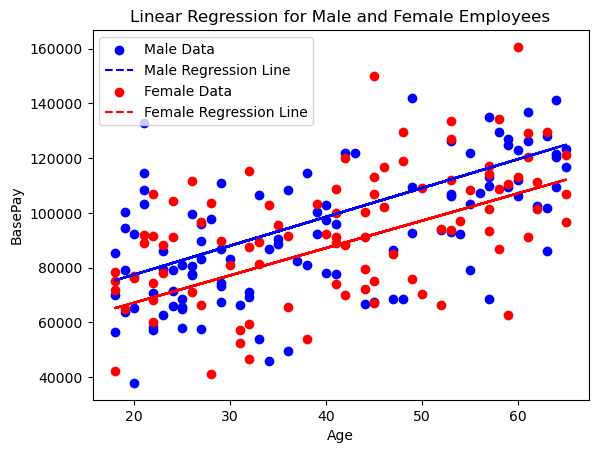

In [18]:
# Importing requiered libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separating the data for male and female employees 
male_data = genderPayGap_DataFrame[genderPayGap_DataFrame['Gender'] == 'Male']
female_data = genderPayGap_DataFrame[genderPayGap_DataFrame['Gender'] == 'Female']

# Fitting Linear regression for 'BasePay' and 'Age' separately for male and female
def perform_linear_regression(data, gender):
    X = data[['Age']]
    y = data['BasePay']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Linear Regression Results for {gender} Employees:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print()

    return X_test, y_test, y_pred

# Perform linear regression for male and female employees
male_X_test, male_y_test, male_y_pred = perform_linear_regression(male_data, 'Male')
female_X_test, female_y_test, female_y_pred = perform_linear_regression(female_data, 'Female')

# Plot the scattered data and regression lines with different colors
plt.scatter(male_X_test, male_y_test, color='blue', label='Male Data')
plt.plot(male_X_test, male_y_pred, color='blue', linestyle='--', label='Male Regression Line')

plt.scatter(female_X_test, female_y_test, color='red', label='Female Data')
plt.plot(female_X_test, female_y_pred, color='red', linestyle='--', label='Female Regression Line')

# Set labels, title and legend
plt.xlabel('Age')
plt.ylabel('BasePay')
plt.title('Linear Regression for Male and Female Employees')
plt.legend()
plt.show()

### Interpretation of Linear regression results for the relationship between 'Age' and 'BasePay' for male and female employees:

For Male Employees:
- Mean Squared Error (MSE): 387,766,065
  - The MSE represents the average squared difference between the actual 'BasePay' values and the predicted values by the linear regression model. Lower MSE values indicate better model performance in terms of prediction accuracy.
- R-squared (R²): 0.302
  - The R-squared value, also known as the coefficient of determination, measures the goodness of fit of the linear regression model. It represents the proportion of the variance in 'BasePay' that is explained by 'Age' for male employees. An R² value of 0.302 indicates that 'Age' explains approximately 30.2% of the variance in 'BasePay' for male employees. In other words, 'Age' has a moderate explanatory power in predicting 'BasePay' for male employees.

For Female Employees:
- Mean Squared Error (MSE): 415,590,998
  - Similar to the male employees, the MSE for female employees represents the average squared difference between the actual 'BasePay' values and the predicted values by the linear regression model. In this case, the MSE is higher compared to males, indicating potentially less accurate predictions for female employees.
- R-squared (R²): 0.231
  - The R-squared value for female employees is 0.231, which means that 'Age' explains approximately 23.1% of the variance in 'BasePay' for female employees. This suggests that 'Age' has a moderate explanatory power in predicting 'BasePay' for female employees, but it explains slightly less variance compared to male employees.

In summary, both male and female employees' 'Age' has a moderate but not extremely strong influence on their 'BasePay' according to the linear regression models. The models capture around 23.1% to 30.2% of the variance in 'BasePay,' indicating that other factors not included in the model may also contribute to differences in 'BasePay' so we further investigate to fit another model with more variables 

/Users/maxheijmans/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/maxheijmans/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/maxheijmans/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/var/folders/8f/d6vjtm3s1n94f73t1f5h0drm0000gn/T/ipykernel_11115/4014400968.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Variable", data=fe_df, p

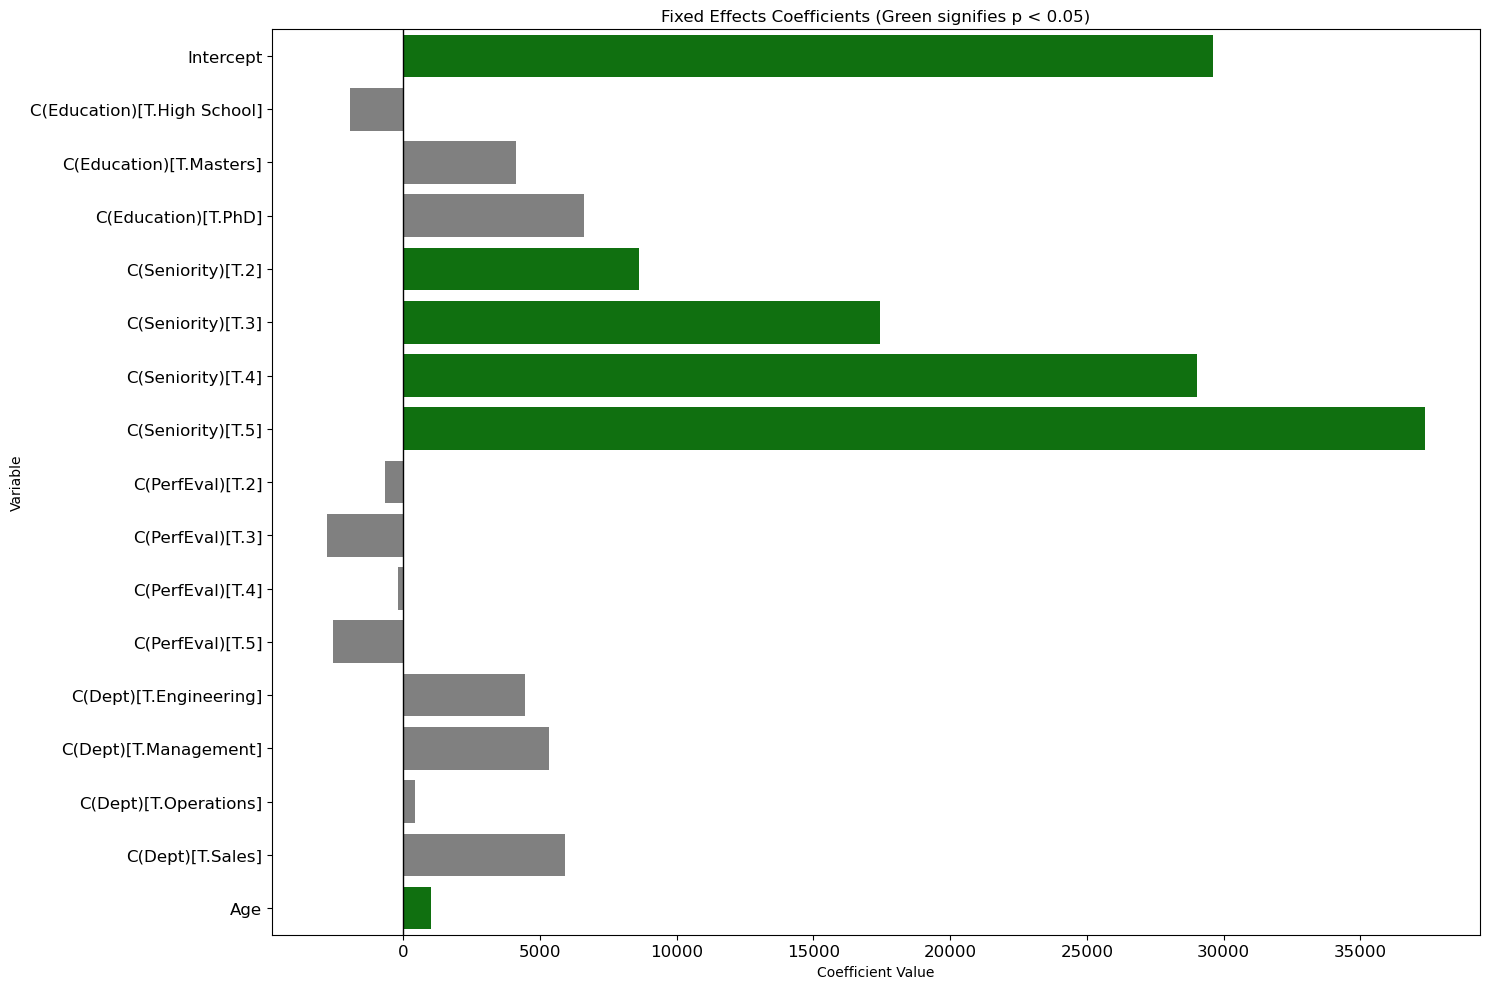

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

# Fitting mixed linear model to predict BasePay based on different categories
# We exclude JobTitle as it was indicated in the t-test that there is no significant difference in various JobTitles between men and women
model1 = smf.mixedlm("BasePay ~ Age + C(Education) + C(Seniority) + C(PerfEval) + C(Dept)", 
            data = genderPayGap_DataFrame, 
            groups = "Gender",
            re_formula= '1 + C(Seniority) + C(PerfEval) + C(Dept) + C(Education)'
            ).fit()
model1.summary()

# Define the variables we want to keep in the plot
variables_to_keep = [
    "Intercept", 
    "C(Education)[T.High School]", 
    "C(Education)[T.Masters]", 
    "C(Education)[T.PhD]", 
    "C(Seniority)[T.2]", 
    "C(Seniority)[T.3]",
    "C(Seniority)[T.4]", 
    "C(Seniority)[T.5]", 
    "C(PerfEval)[T.2]", 
    "C(PerfEval)[T.3]", 
    "C(PerfEval)[T.4]",
    "C(PerfEval)[T.5]", 
    "C(Dept)[T.Engineering]", 
    "C(Dept)[T.Management]", 
    "C(Dept)[T.Operations]", 
    "C(Dept)[T.Sales]", 
    "Age"
]

# Get a summary of the fixed effects
fe_df = pd.DataFrame({
    'Variable': model1.params.index,
    'Coefficient': model1.params.values,
    'Std. Err.': model1.bse.values,
    'P>|z|': model1.pvalues
})

# Filter the DataFrame to only include the variables we want to keep
fe_df = fe_df[fe_df['Variable'].isin(variables_to_keep)].reset_index(drop=True)

# Figure size
plt.figure(figsize=(15, 10))

# Colors based on p-value significance, green for significant, grey for insignificant
color_map = {variable: "green" if p < 0.05 else "gray" for variable, p in zip(fe_df['Variable'], fe_df['P>|z|'])}

# Horizontal bar plot
sns.barplot(x="Coefficient", y="Variable", data=fe_df, palette=color_map)

# Line to indicate the zero point
plt.axvline(0, color='black', linewidth=1)

# Adjust the limits, labels, title, and grid
plt.xlim(fe_df["Coefficient"].min() - 2000, fe_df["Coefficient"].max() + 2000)
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.title("Fixed Effects Coefficients (Green signifies p < 0.05)")

# Increase the text size for readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the figure
plt.tight_layout()
plt.savefig(r'/Users/maxheijmans/Downloads/fixed_effects_overview.png')
plt.show()

The analysis of the mixed linear model results for predicting BasePay gives us several insights:

### Fixed Effects Coefficients
- **Intercept**: The estimated base salary (without considering the effects of other variables) is $29,614 with a standard error of $7,091.76. This is statistically significant (p < 0.0001), indicating a strong effect.
- **Education**: Compared to a baseline (College), having a high school education decreases expected salary by $1,949 (not significant), a Master's increases it by $4,126 (not significant), and a PhD increases it by $6,596 (p = 0.127, marginally not significant).
- **Seniority**: Higher levels of seniority are associated with significant increases in salary. For example, Seniority level 5 is associated with a $37,371 increase in salary compared to the baseline level.
- **Performance Evaluation (PerfEval)**: There are no significant changes in salary based on performance evaluation scores when controlling for other factors.
- **Department (Dept)**: Working in different departments is associated with different changes in salary, with Engineering and Management showing positive effects, but these are not statistically significant.
- **Age**: For every additional year of age, the salary increases by $1,023, which is highly significant (p < 0.0001).


### Random Effects
The model includes random effects, which account for variations within groups (likely within the "Gender" category and the interaction between Gender and other variables like Seniority and Performance Evaluation). These effects include variances and covariances that capture the relationship between these variables within the defined groups.

For instance:
- There's a considerable variance component associated with Gender, which suggests that there's variability in the baseline salary due to Gender that is not explained by the fixed effects in the model.
- The covariances between Gender and categories like Seniority levels and Departments indicate that the relationship between these variables and salary may differ by Gender.

### Summary:
- **Seniority** and **Age** appear to be the most important and significant predictors of base pay in this model.
- **Education**, **Performance Evaluation**, and **Department** factors do not have a statistically significant impact on base pay, according to this model.
- There are significant random effects, particularly with **Gender**, suggesting that base pay is influenced by gender and its interaction with other factors like seniority.
- The lack of significance in the **Performance Evaluation** and **Department** categories could be due to a variety of reasons, including a lack of variability in these factors, the presence of other, unmeasured variables that are actually influencing base pay, or that these factors truly do not have a strong impact on base pay within this particular sample.


# QQ Plot of Residuals
The QQ plot checks if the residuals are normally distributed, which is an assumption of linear models and shows the level of fitness.

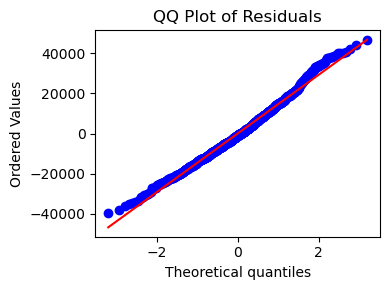

In [20]:
# QQ Plot of Residuals
residuals = model1.resid
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
stats.probplot(residuals, dist="norm", plot=ax)
ax.get_lines()[1].set_color('red')
plt.title('QQ Plot of Residuals')
plt.tight_layout()
plt.show()

### Interpretation:
A Q-Q plot is a graph that helps us check if our data follows a certain pattern after the use of a regression model. If the points on the graph make a straight line (45 degrees), our data fits the pattern well. If they don't, it tells us the data might be skewed or have outliers.

In this case, the scatterplot follows the 45 degree line, therefore, our data fits the pattern.